In [9]:
import tensorflow as tf
import tensorflow.keras.layers as layer
from tensorflow.keras.optimizers import SGD, Adam, RMSprop,Adagrad
from tensorflow.keras.optimizers.schedules import ExponentialDecay,PiecewiseConstantDecay,CosineDecay

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow.keras.layers as layer
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split

In [19]:
df = sns.load_dataset('titanic')

In [21]:
df.dropna(inplace = True)

In [34]:

df['class'] = LabelEncoder().fit_transform(df['class'])

df['adult_male'] = LabelEncoder().fit_transform(df['adult_male'])
df['deck'] = LabelEncoder().fit_transform(df['deck'])


In [38]:
df['alone'] = LabelEncoder().fit_transform(df['alone'])

Training with SGD...
Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 90ms/step - accuracy: 0.3645 - loss: 0.8405 - val_accuracy: 0.2069 - val_loss: 0.7474
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.3601 - loss: 0.7664 - val_accuracy: 0.2414 - val_loss: 0.7291
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.4373 - loss: 0.7959 - val_accuracy: 0.2759 - val_loss: 0.7099
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.6002 - loss: 0.6798 - val_accuracy: 0.3793 - val_loss: 0.6944
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.5553 - loss: 0.7015 - val_accuracy: 0.4828 - val_loss: 0.6799
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.5925 - loss: 0.6852 - val_accuracy: 0.5862 - val_loss: 0.6664
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.6202 - loss: 0.6512 - val_accuracy: 0.6207 - val_loss: 0.6544
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.5378 - loss: 0.6935 - val_accuracy: 0.655

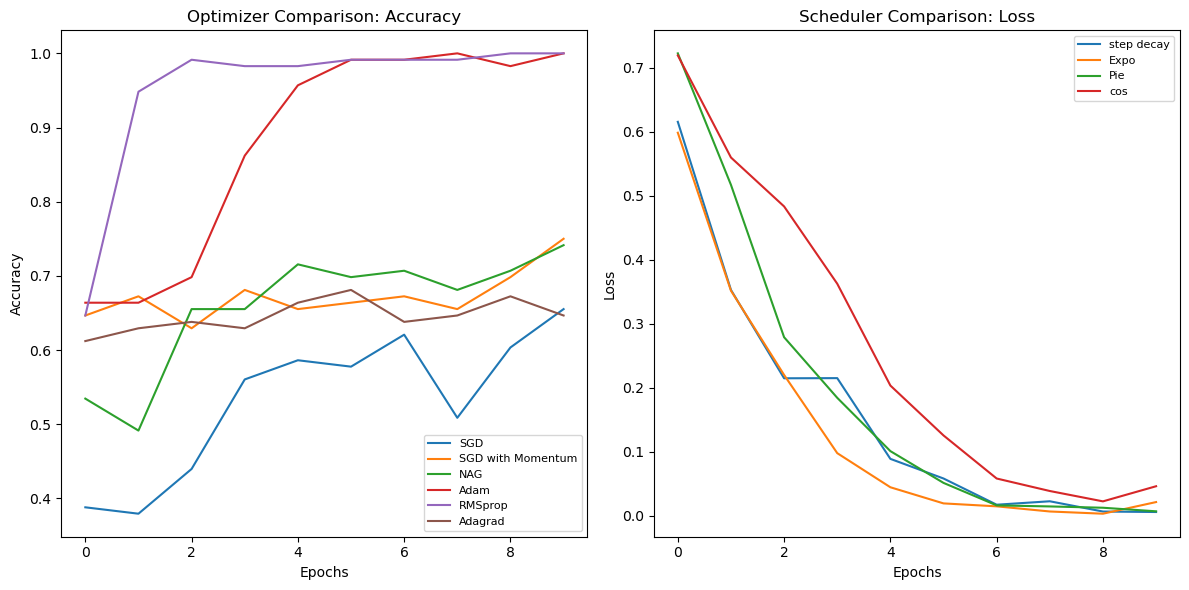

In [66]:
x = df.drop(columns = 'survived')
y = df['survived']
x = StandardScaler().fit_transform(x)
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

def create_model(optimizer):
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(8, activation='relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

def train(model,x_train,y_train):
    history = model.fit(x_train, y_train, epochs=10, batch_size=32, verbose=1, validation_split=0.2)
    return history

optimizer_dict = {
    "SGD":SGD(learning_rate=0.01),
    "SGD with Momentum" : SGD(learning_rate = 0.01,momentum=0.9),
    "NAG" : SGD(learning_rate = 0.01,momentum = 0.9,nesterov=True),
    "Adam" : Adam(learning_rate=0.01),
    "RMSprop": RMSprop(learning_rate=0.01),
    "Adagrad": Adagrad(learning_rate=0.01)
}

lr_schedulers = {
    "step decay": ExponentialDecay(initial_learning_rate=0.01,decay_steps=10000,
                                  decay_rate=0.9, staircase=True),
    "Expo":ExponentialDecay(initial_learning_rate = 0.01,decay_steps = 1000,decay_rate = 0.96,staircase = False),
    "Pie" : PiecewiseConstantDecay(boundaries=[5000,10000],values = [0.01,0.005,0.001]),
    "cos":CosineDecay(initial_learning_rate = 0.01,decay_steps=10000,alpha=0.1)
}

histories1 = {}

for name,opt in optimizer_dict.items():
    print(f"Training with {name}...")
    model = create_model(opt)
    histories1[name] = train(model, x_train, y_train)

histories2 = {}
for sched_name, scheduler in lr_schedulers.items():
    print(f"Training Adam with {sched_name}...")
    optimizer = Adam(learning_rate=scheduler)
    model = create_model(optimizer)
    histories2[sched_name] = train(model, x_train, y_train)

import matplotlib.pyplot as plt




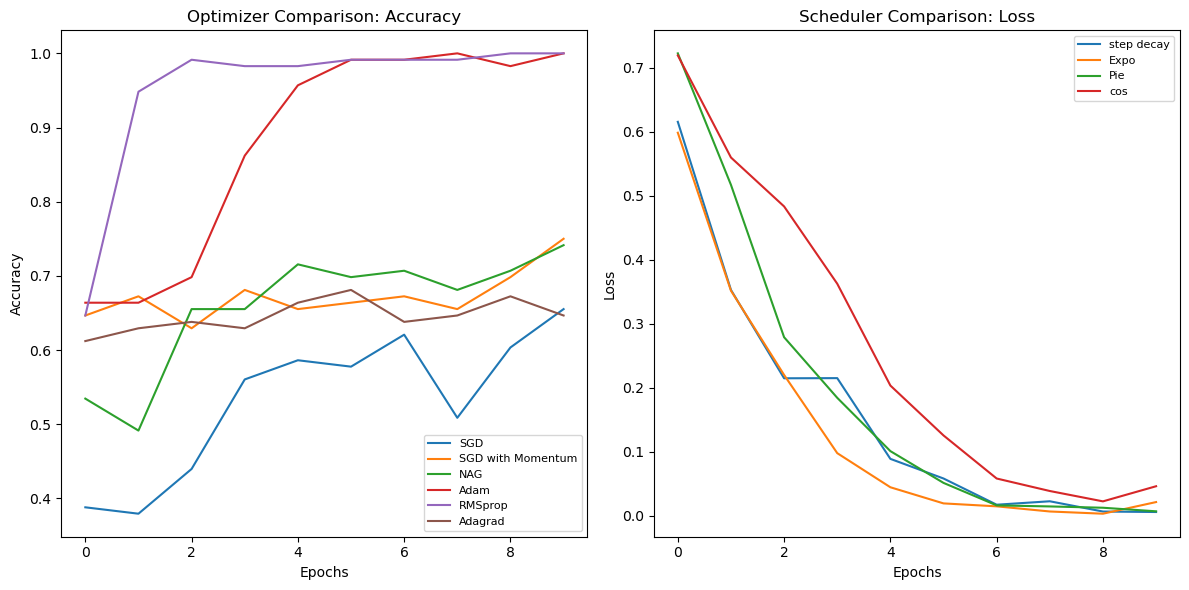

In [72]:
# Plot Accuracy for Optimizers (histories1)
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)  # First subplot for accuracy
for key, history in histories1.items():
    plt.plot(history.history['accuracy'], label=key)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Optimizer Comparison: Accuracy')
plt.legend(fontsize=8)

# Plot Loss for Learning Rate Schedulers (histories2)
plt.subplot(1, 2, 2)  # Second subplot for loss
for key, history in histories1.items():
    plt.plot(history.history['loss'], label=key)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Scheduler Comparison: Loss')
plt.legend(fontsize=8)

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()